In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [5]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [6]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features] # TODO: Select features

    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X) # TODO: Apply StandardScaler

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)


Data shape: (45211, 9)


In [13]:
correlation_matrix = data.corr()
print("Correlation Matrix calculated.")

Correlation Matrix calculated.


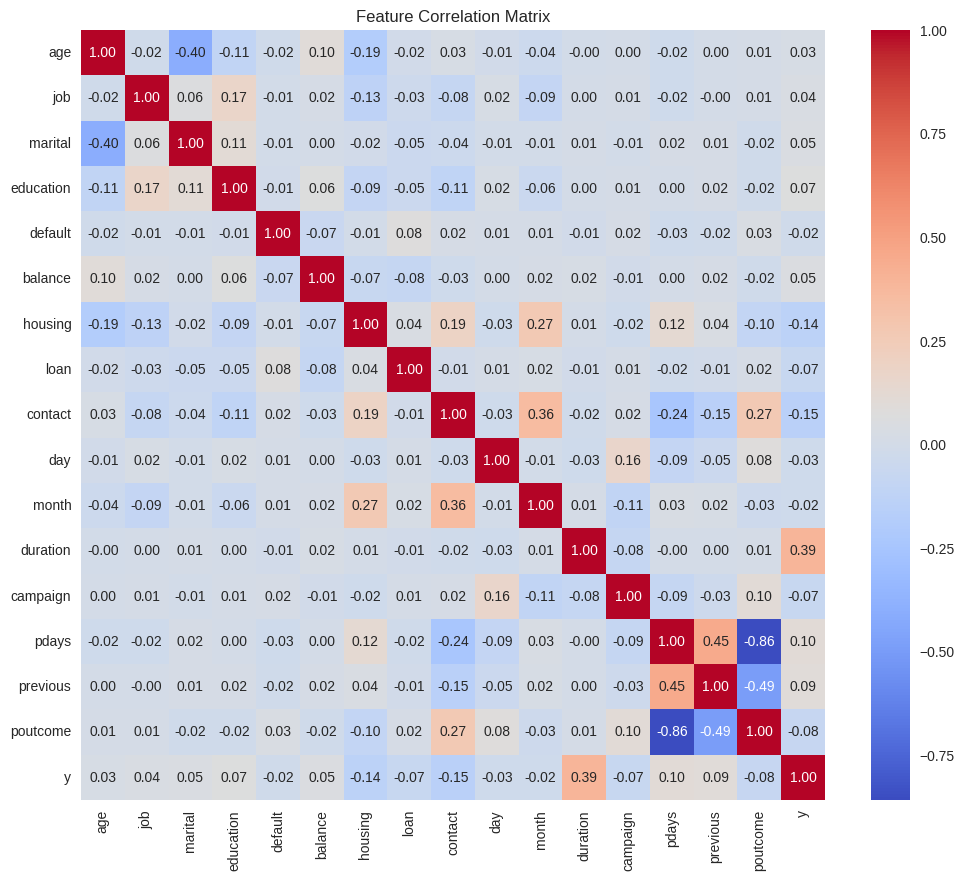

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [7]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                new_centroids[i] = points_in_cluster.mean(axis=0)
            else:
                # If a cluster becomes empty, reinitialize its centroid
                # This is one strategy; others include keeping the old centroid
                # or assigning a random point from X
                new_centroids[i] = self._initialize_centroids(X)[0] # Taking one random point for simplicity
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            self.labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, self.labels)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids, atol=1e-4):
                break

            self.centroids = new_centroids
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

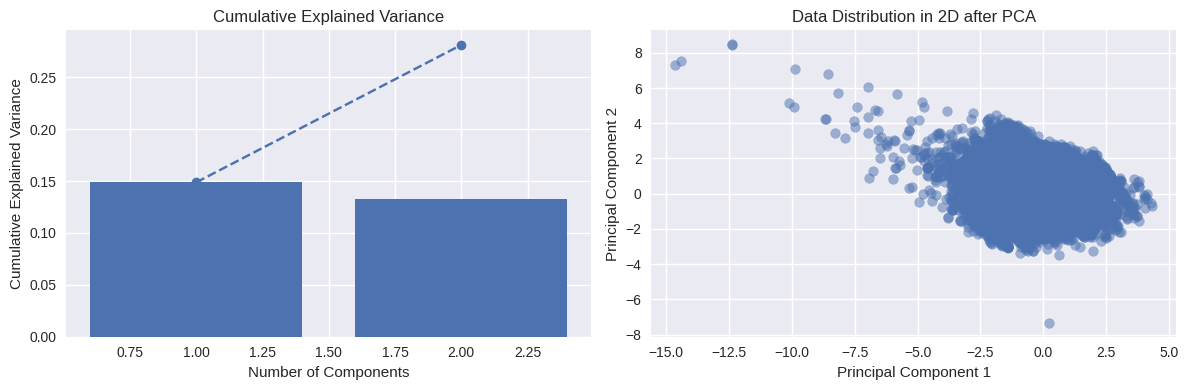

Shape after PCA: (45211, 2)


In [8]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(12, 4))

    # Plot explained variance
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio per Principal Component')

    # Plot cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance')
    plt.grid(True)

    # Plot data in 2D
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Data Distribution in 2D after PCA')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

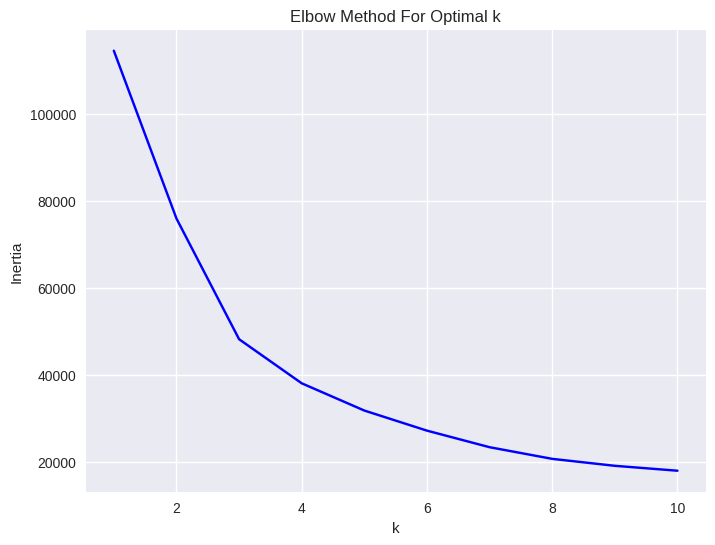

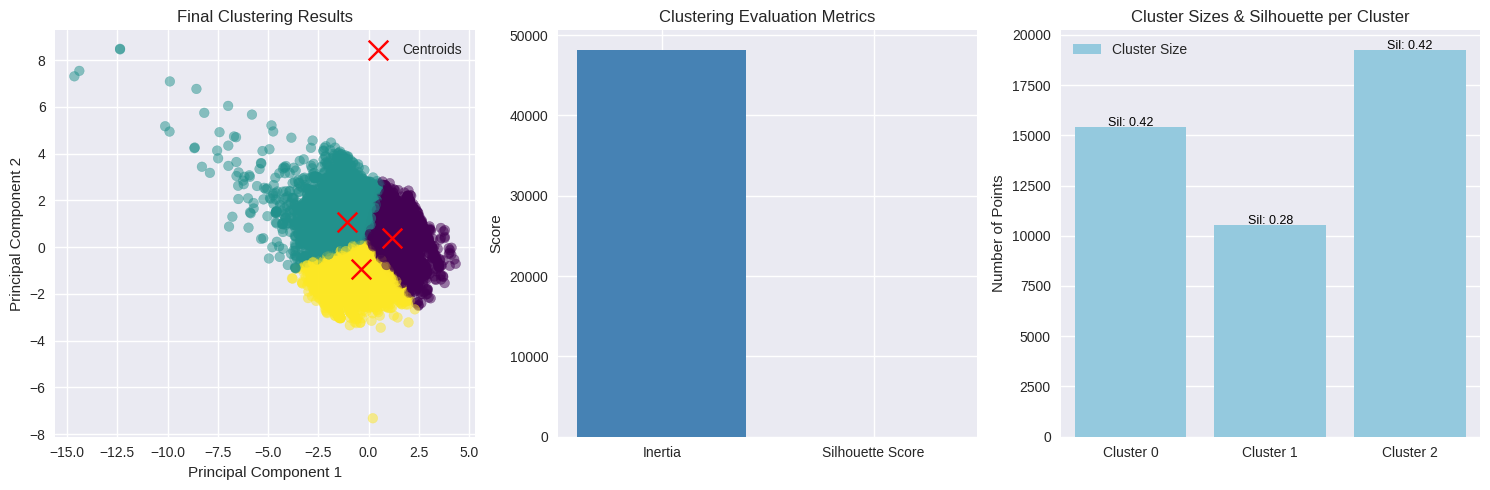

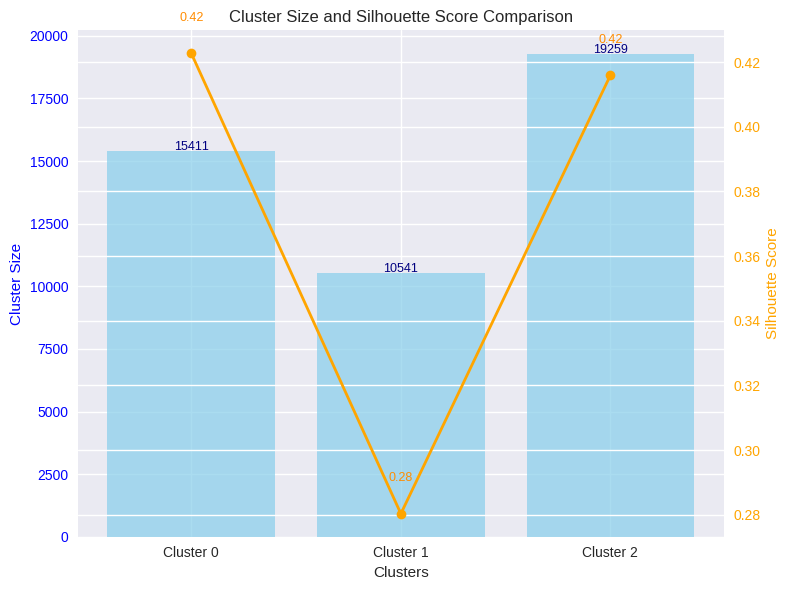


🧩 Clustering Evaluation Summary:
Inertia: 48179.64
Overall Silhouette Score: 0.39

📊 Cluster Details:
 - Cluster 0: Size = 15411, Silhouette = 0.42
 - Cluster 1: Size = 10541, Silhouette = 0.28
 - Cluster 2: Size = 19259, Silhouette = 0.42

✅ Images saved as:
  • /content/final_clustering_evaluation.png
  • /content/cluster_metrics_summary.png


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia)."""
    inertia = 0
    for i in range(len(centroids)):
        points_in_cluster = X[labels == i]
        if len(points_in_cluster) > 0:
            inertia += np.sum((points_in_cluster - centroids[i]) ** 2)
    return inertia


def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters."""
    inertias = []
    K = range(1, max_k + 1)

    for k in K:
        kmeans = KMeansClustering(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(calculate_inertia(X, kmeans.labels, kmeans.centroids))

    plt.figure(figsize=(8, 6))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.grid(True)
    plt.show()

    return inertias


# Run elbow
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Compute metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette_avg = silhouette_score(X_pca, kmeans.labels)
silhouette_vals = silhouette_samples(X_pca, kmeans.labels)

unique_labels, cluster_sizes = np.unique(kmeans.labels, return_counts=True)
cluster_silhouette_scores = [np.mean(silhouette_vals[kmeans.labels == i]) for i in unique_labels]

# --- 3-panel visualization ---
plt.figure(figsize=(15, 5))

# 1️⃣ Final clustering
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# 2️⃣ Overall metrics
plt.subplot(1, 3, 2)
plt.bar(['Inertia', 'Silhouette Score'], [inertia, silhouette_avg], color=['steelblue', 'orange'])
plt.title('Clustering Evaluation Metrics')
plt.ylabel('Score')

# 3️⃣ Cluster sizes and individual silhouette
plt.subplot(1, 3, 3)
sns.barplot(x=[f"Cluster {i}" for i in unique_labels],
            y=cluster_sizes, color='skyblue', label='Cluster Size')
for i, val in enumerate(cluster_silhouette_scores):
    plt.text(i, cluster_sizes[i] + 50, f"Sil: {val:.2f}", ha='center', fontsize=9, color='black')
plt.title('Cluster Sizes & Silhouette per Cluster')
plt.ylabel('Number of Points')
plt.legend()

plt.tight_layout()
plt.savefig("/content/final_clustering_evaluation.png", dpi=300, bbox_inches='tight')
plt.show()


# --- 📊 New image: Combined chart for Cluster Size & Silhouette ---
fig, ax1 = plt.subplots(figsize=(8, 6))

clusters = [f"Cluster {i}" for i in unique_labels]
bar = ax1.bar(clusters, cluster_sizes, color='skyblue', alpha=0.7, label='Cluster Size')
ax1.set_xlabel('Clusters')
ax1.set_ylabel('Cluster Size', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add second axis for silhouette
ax2 = ax1.twinx()
ax2.plot(clusters, cluster_silhouette_scores, color='orange', marker='o', linewidth=2, label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Annotate values
for i, (size, sil) in enumerate(zip(cluster_sizes, cluster_silhouette_scores)):
    ax1.text(i, size + 50, f"{size}", ha='center', color='navy', fontsize=9)
    ax2.text(i, sil + 0.01, f"{sil:.2f}", ha='center', color='darkorange', fontsize=9)

plt.title('Cluster Size and Silhouette Score Comparison')
fig.tight_layout()
plt.savefig("/content/cluster_metrics_summary.png", dpi=300, bbox_inches='tight')
plt.show()

print("\n🧩 Clustering Evaluation Summary:")
print(f"Inertia: {inertia:.2f}")
print(f"Overall Silhouette Score: {silhouette_avg:.2f}\n")

print("📊 Cluster Details:")
for i, (size, sil) in enumerate(zip(cluster_sizes, cluster_silhouette_scores)):
    print(f" - Cluster {i}: Size = {size}, Silhouette = {sil:.2f}")

print("\n✅ Images saved as:")
print("  • /content/final_clustering_evaluation.png")
print("  • /content/cluster_metrics_summary.png")


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

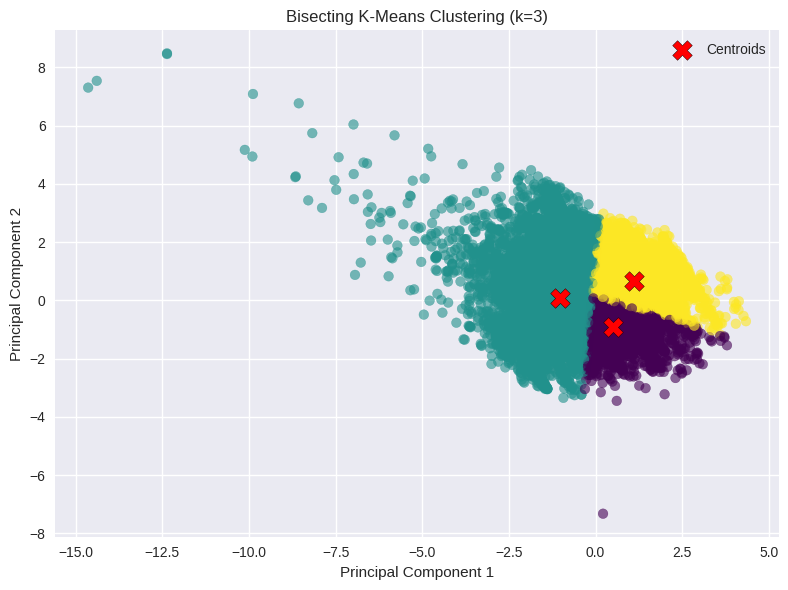

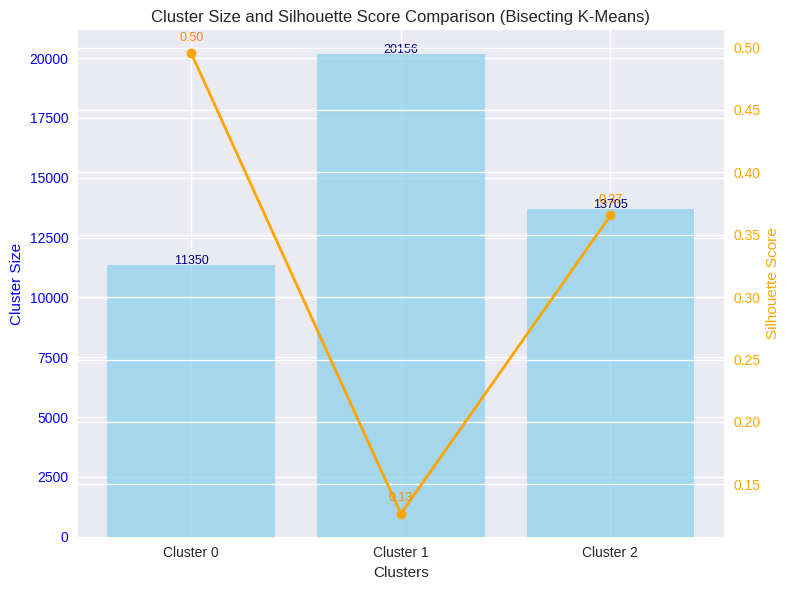

/tmp/ipython-input-1980461457.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


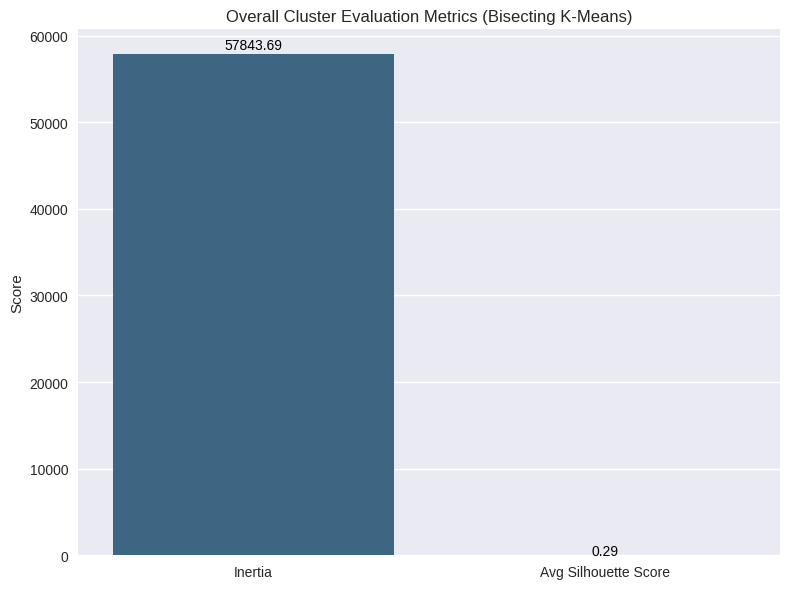

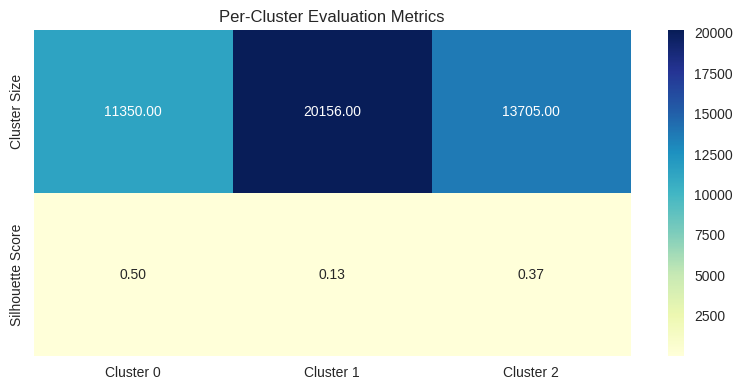


🧩 Bisecting K-Means (k=3) Summary:
Inertia: 57843.69
Overall Silhouette Score: 0.29

📊 Cluster Details:
 - Cluster 0: Size = 11350, Silhouette = 0.50
 - Cluster 1: Size = 20156, Silhouette = 0.13
 - Cluster 2: Size = 13705, Silhouette = 0.37

✅ Images saved as:
  • /content/bisecting_kmeans_clusters.png
  • /content/bisecting_kmeans_cluster_metrics.png
  • /content/bisecting_kmeans_overall_metrics.png
  • /content/bisecting_kmeans_per_cluster_table.png


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns

class BisectingKMeans:
    """Bisecting K-Means clustering algorithm implementation."""
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}
        self.centers_ = {}

    def fit_predict(self, X):
        """Fit and predict using Bisecting K-Means."""
        if self.n_clusters < 1:
            raise ValueError("n_clusters must be at least 1")

        # Start with all points in one cluster
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        current_num_clusters = 1
        next_cluster_id = 1
        self.centers_ = {0: X.mean(axis=0)}

        while current_num_clusters < self.n_clusters:
            # Find the largest cluster by size
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            largest_cluster_id = unique_labels[np.argmax(counts)]

            # Extract points to split
            points_idx = np.where(self.labels_ == largest_cluster_id)[0]
            points = X[points_idx]

            if len(points) < 2:
                break

            # Run binary KMeans on the largest cluster
            binary_kmeans = KMeans(n_clusters=2, random_state=self.random_state, n_init='auto')
            binary_kmeans.fit(points)
            sub_labels = binary_kmeans.labels_

            # Assign new labels
            self.labels_[points_idx[sub_labels == 1]] = next_cluster_id

            # Store new centroids
            self.centers_[largest_cluster_id] = binary_kmeans.cluster_centers_[0]
            self.centers_[next_cluster_id] = binary_kmeans.cluster_centers_[1]

            # Record the split
            self.split_tree[largest_cluster_id] = (largest_cluster_id, next_cluster_id)

            next_cluster_id += 1
            current_num_clusters += 1

        return self.labels_


# --- Run Bisecting K-Means ---
k = 3  # Number of clusters
bisect = BisectingKMeans(n_clusters=k, random_state=42)
labels = bisect.fit_predict(X_pca)

# --- Compute evaluation metrics ---
inertia = 0
for i in range(k):
    cluster_points = X_pca[labels == i]
    if len(cluster_points) > 0:
        inertia += np.sum((cluster_points - bisect.centers_[i])**2)

silhouette_avg = silhouette_score(X_pca, labels)
silhouette_vals = silhouette_samples(X_pca, labels)

unique_labels, cluster_sizes = np.unique(labels, return_counts=True)
cluster_silhouette_scores = [np.mean(silhouette_vals[labels == i]) for i in unique_labels]

# --- 1️⃣ MAIN CLUSTERING VISUALIZATION ---
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
centroids = np.array([bisect.centers_[i] for i in range(k)])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', edgecolor='black', label='Centroids')
plt.title('Bisecting K-Means Clustering (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/content/bisecting_kmeans_clusters.png", dpi=300, bbox_inches='tight')
plt.show()

# --- 2️⃣ CLUSTER SIZE & SILHOUETTE COMPARISON ---
fig, ax1 = plt.subplots(figsize=(8, 6))
clusters = [f"Cluster {i}" for i in unique_labels]

bars = ax1.bar(clusters, cluster_sizes, color='skyblue', alpha=0.7, label='Cluster Size')
ax1.set_xlabel('Clusters')
ax1.set_ylabel('Cluster Size', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add silhouette on secondary axis
ax2 = ax1.twinx()
ax2.plot(clusters, cluster_silhouette_scores, color='orange', marker='o', linewidth=2, label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Annotate bars and points
for i, (size, sil) in enumerate(zip(cluster_sizes, cluster_silhouette_scores)):
    ax1.text(i, size + 50, f"{size}", ha='center', color='navy', fontsize=9)
    ax2.text(i, sil + 0.01, f"{sil:.2f}", ha='center', color='darkorange', fontsize=9)

plt.title('Cluster Size and Silhouette Score Comparison (Bisecting K-Means)')
fig.tight_layout()
plt.savefig("/content/bisecting_kmeans_cluster_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

# --- 3️⃣ OVERALL CLUSTER EVALUATION METRICS ---
plt.figure(figsize=(8, 6))
metrics = ['Inertia', 'Avg Silhouette Score']
values = [inertia, silhouette_avg]

sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Overall Cluster Evaluation Metrics (Bisecting K-Means)')
for i, val in enumerate(values):
    plt.text(i, val + (0.01 * val), f"{val:.2f}", ha='center', fontsize=10, color='black')
plt.ylabel('Score')
plt.tight_layout()
plt.savefig("/content/bisecting_kmeans_overall_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

# --- 4️⃣ PER-CLUSTER METRICS TABLE AS IMAGE ---
plt.figure(figsize=(8, 4))
sns.heatmap(
    np.array([cluster_sizes, cluster_silhouette_scores]),
    annot=True, fmt=".2f", cmap="YlGnBu",
    xticklabels=[f"Cluster {i}" for i in unique_labels],
    yticklabels=["Cluster Size", "Silhouette Score"]
)
plt.title("Per-Cluster Evaluation Metrics")
plt.tight_layout()
plt.savefig("/content/bisecting_kmeans_per_cluster_table.png", dpi=300, bbox_inches='tight')
plt.show()

# --- 5️⃣ PRINT SUMMARY ---
print("\n🧩 Bisecting K-Means (k=3) Summary:")
print(f"Inertia: {inertia:.2f}")
print(f"Overall Silhouette Score: {silhouette_avg:.2f}\n")

print("📊 Cluster Details:")
for i, (size, sil) in enumerate(zip(cluster_sizes, cluster_silhouette_scores)):
    print(f" - Cluster {i}: Size = {size}, Silhouette = {sil:.2f}")

print("\n✅ Images saved as:")
print("  • /content/bisecting_kmeans_clusters.png")
print("  • /content/bisecting_kmeans_cluster_metrics.png")
print("  • /content/bisecting_kmeans_overall_metrics.png")
print("  • /content/bisecting_kmeans_per_cluster_table.png")


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!

# Task
Create a feature correlation matrix plot, the 'Explained Variance by Component' and 'Data Distribution in PCA Space' plots using the `X_scaled` data, and finally, generate 'Inertia Plot' and 'Silhouette Score Plot' for K-means clustering over a range of 'k' values.

## Generate Feature Correlation Matrix Plot

### Subtask:
Calculate and visualize the feature correlation matrix for the preprocessed dataset.


**Reasoning**:
To calculate the correlation matrix, I need to use the `data` DataFrame, which contains the preprocessed features. The correlation matrix will show the relationships between all pairs of features.



**Reasoning**:
Now that the correlation matrix is calculated, I will visualize it using a heatmap to show the relationships between features, including annotations for better readability and a descriptive title.



## Generate PCA Plots

### Subtask:
Generate the 'Explained variance by Component' and 'Data Distribution in PCA Space' plots.


**Reasoning**:
The subtask requires generating PCA plots. The `apply_pca` function is designed to perform PCA and generate the requested plots. By calling it with `X_scaled` and `n_components` set to the number of features, it will produce the 'Explained Variance by Component' and 'Data Distribution in 2D after PCA' plots.



In [ ]:
n_features = X_scaled.shape[1]
X_pca_full = apply_pca(X_scaled, n_components=n_features)
print("PCA plots generated for all components.")